In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [4]:
# file contains some invalid chars
# depending on which version of pandas you have
# an error may be thrown
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks2/NLP/lab10/spam (2).csv', encoding='ISO-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# rename columns to something better
df.columns = ['labels', 'data']

<Axes: >

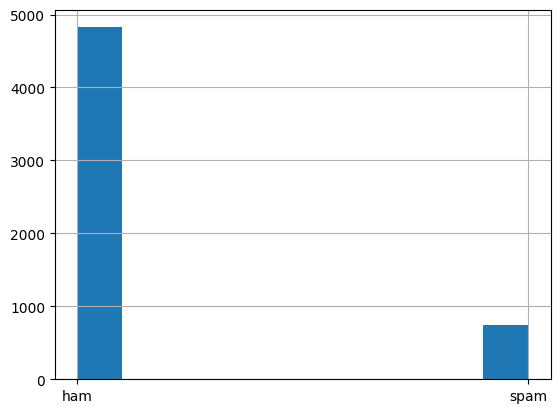

In [9]:
df['labels'].hist()

In [10]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].to_numpy()

In [11]:
# split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(
    df['data'], Y, test_size=0.33)

Creating features using CountVectorizer

In [12]:
# try multiple ways of calculating features
# featurizer = TfidfVectorizer(decode_error='ignore')
# Xtrain = featurizer.fit_transform(df_train)
# Xtest = featurizer.transform(df_test)

featurizer = CountVectorizer(decode_error='ignore')
Xtrain = featurizer.fit_transform(df_train)
Xtest = featurizer.transform(df_test)

In [13]:
Xtrain

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 49115 stored elements and shape (3733, 7019)>

In [14]:
# create the model, train it, print scores
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train acc:", model.score(Xtrain, Ytrain))
print("test acc:", model.score(Xtest, Ytest))

train acc: 0.995178140905438
test acc: 0.9804241435562806


In [15]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
print("train F1:", f1_score(Ytrain, Ptrain))
print("test F1:", f1_score(Ytest, Ptest))

train F1: 0.9814432989690721
test F1: 0.9274193548387096


In [16]:
Prob_train = model.predict_proba(Xtrain)[:,1]
Prob_test = model.predict_proba(Xtest)[:,1]
print("train AUC:", roc_auc_score(Ytrain, Prob_train))
print("test AUC:", roc_auc_score(Ytest, Prob_test))

train AUC: 0.994785558216652
test AUC: 0.9660629902080187


In [17]:
cm = confusion_matrix(Ytrain, Ptrain)
cm

array([[3239,    7],
       [  11,  476]])

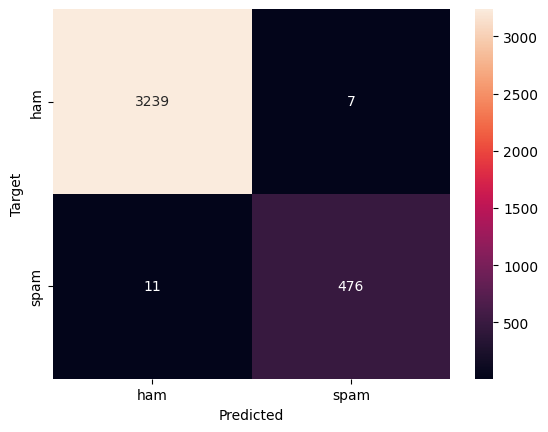

In [18]:
# Scikit-Learn is transitioning to V1 but it's not available on Colab
# The changes modify how confusion matrices are plotted
def plot_cm(cm):
  classes = ['ham', 'spam']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

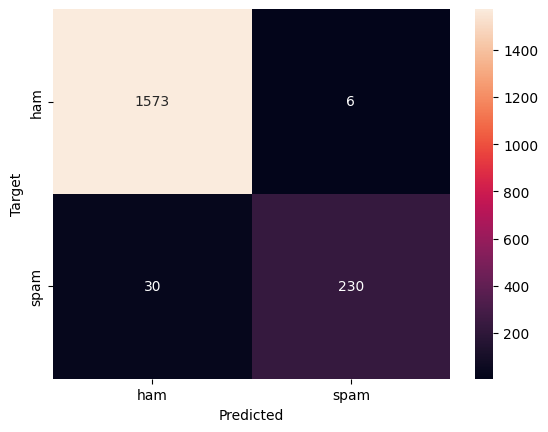

In [19]:
cm_test = confusion_matrix(Ytest, Ptest)
plot_cm(cm_test)

In [21]:
# visualize the data
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

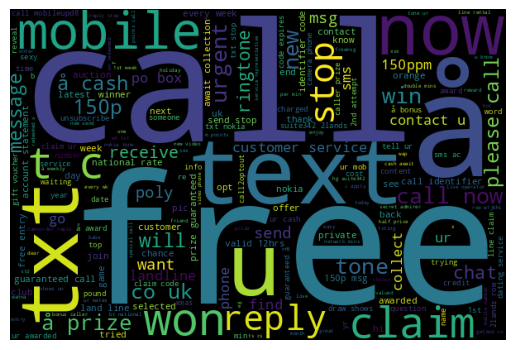

In [22]:
visualize('spam')

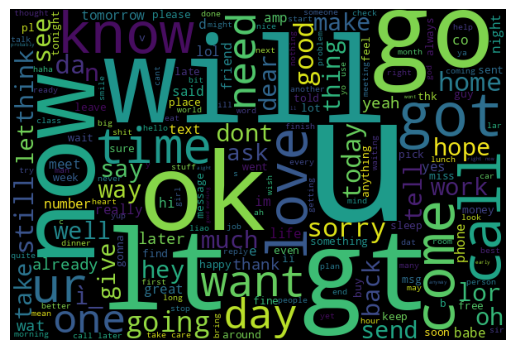

In [23]:
visualize('ham')

In [24]:
# see what we're getting wrong
X = featurizer.transform(df['data'])
df['predictions'] = model.predict(X)

In [25]:
# things that should be spam
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Dont forget you can place as many FREE Requests with 1stchoice.co.uk as you wish. For more Information call 08707808226.
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
For sale - arsenal dartboard. Good condition but no doubles or trebles!
CLAIRE here am havin borin time & am now alone U wanna cum ov

In [26]:
# things that should not be spam
# perhaps some are mislabeled?
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
  print(msg)

Finally the match heading towards draw as your prediction.
Waiting for your call.
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Total video converter free download type this in google search:)
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Received, understood n acted upon!
I liked the new mobile
Anytime...
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Dhoni have luck to win some big title.so we will win:)


----

Building and evaluating two different machine learning models for spam detection, using two different approaches for representing text data (CountVectorizer and TF-IDF). The goal is to identify the model that most accurately classifies SMS messages as either spam or ham.

In [28]:

from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud

# Load the data, handling potential encoding issues
try:
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks2/NLP/lab10/spam (2).csv', encoding='latin-1')
except UnicodeDecodeError:
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks2/NLP/lab10/spam (2).csv', encoding='ISO-8859-1')
except FileNotFoundError:
    print("Error: File not found. Check the file path.")
    exit()

# Data preprocessing
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, errors='ignore')
df.columns = ['labels', 'data']
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].to_numpy()

# Split data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33, random_state=42) # Added random_state for reproducibility

# Create a pipeline for easier model evaluation and hyperparameter tuning
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB()),
])


# Hyperparameter tuning using GridSearchCV
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],  # Unigrams or bigrams
    'clf__alpha': [0.1, 1.0, 10.0], # Laplace smoothing parameter
}

grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='f1')
grid_search.fit(df_train, Ytrain)

print("Best parameters set:")
print(grid_search.best_estimator_.get_params())
print()

# Evaluate the best model
best_model = grid_search.best_estimator_
Ypred = best_model.predict(df_test)
print(classification_report(Ytest, Ypred)) # More detailed classification metrics
print("Test AUC:", roc_auc_score(Ytest, best_model.predict_proba(df_test)[:, 1]))

#  different vectorizers (TF-IDF)
tfidf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

tfidf_parameters = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__alpha': [0.1, 1.0, 10.0],
}

tfidf_grid_search = GridSearchCV(tfidf_pipeline, tfidf_parameters, cv=5, scoring='f1')
tfidf_grid_search.fit(df_train, Ytrain)

print("\nTF-IDF Best parameters set:")
print(tfidf_grid_search.best_estimator_.get_params())
print()

best_tfidf_model = tfidf_grid_search.best_estimator_
Ypred_tfidf = best_tfidf_model.predict(df_test)
print(classification_report(Ytest, Ypred_tfidf))
print("Test AUC (TF-IDF):", roc_auc_score(Ytest, best_tfidf_model.predict_proba(df_test)[:, 1]))



Best parameters set:
{'memory': None, 'steps': [('vect', CountVectorizer()), ('clf', MultinomialNB(alpha=0.1))], 'transform_input': None, 'verbose': False, 'vect': CountVectorizer(), 'clf': MultinomialNB(alpha=0.1), 'vect__analyzer': 'word', 'vect__binary': False, 'vect__decode_error': 'strict', 'vect__dtype': <class 'numpy.int64'>, 'vect__encoding': 'utf-8', 'vect__input': 'content', 'vect__lowercase': True, 'vect__max_df': 1.0, 'vect__max_features': None, 'vect__min_df': 1, 'vect__ngram_range': (1, 1), 'vect__preprocessor': None, 'vect__stop_words': None, 'vect__strip_accents': None, 'vect__token_pattern': '(?u)\\b\\w\\w+\\b', 'vect__tokenizer': None, 'vect__vocabulary': None, 'clf__alpha': 0.1, 'clf__class_prior': None, 'clf__fit_prior': True, 'clf__force_alpha': True}

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1587
           1       0.96      0.90      0.93       252

    accuracy                           0.98      183